In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Q 1: Identify the categorical features, Seggregate the nominal features from Ordinal features ?

In [5]:
data['Gender'] = data['Gender'].astype('category')#nominal
data['Married'] = data['Married'].astype('category')#nominal
data['Education'] = data['Education'].astype('category')#ordinal
data['Self_Employed'] = data['Self_Employed'].astype('category')#nominal
data['Property_Area'] = data['Property_Area'].astype('category')#nominal
data['Loan_Status'] = data['Loan_Status'].astype('category')#nominal
data['Credit_History'] = data['Credit_History'].astype('category')#ordinal
data.select_dtypes(include=['category']).dtypes

Gender            category
Married           category
Education         category
Self_Employed     category
Credit_History    category
Property_Area     category
Loan_Status       category
dtype: object

**ordinal:** 
    Education,Credit_History
    
**nominal:** 
    Gender,Married,Self Employed,Property Area,Loan_Status

### Q 2: Identify the distribution of all categorical features ?

In [6]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

# Bernoulli 

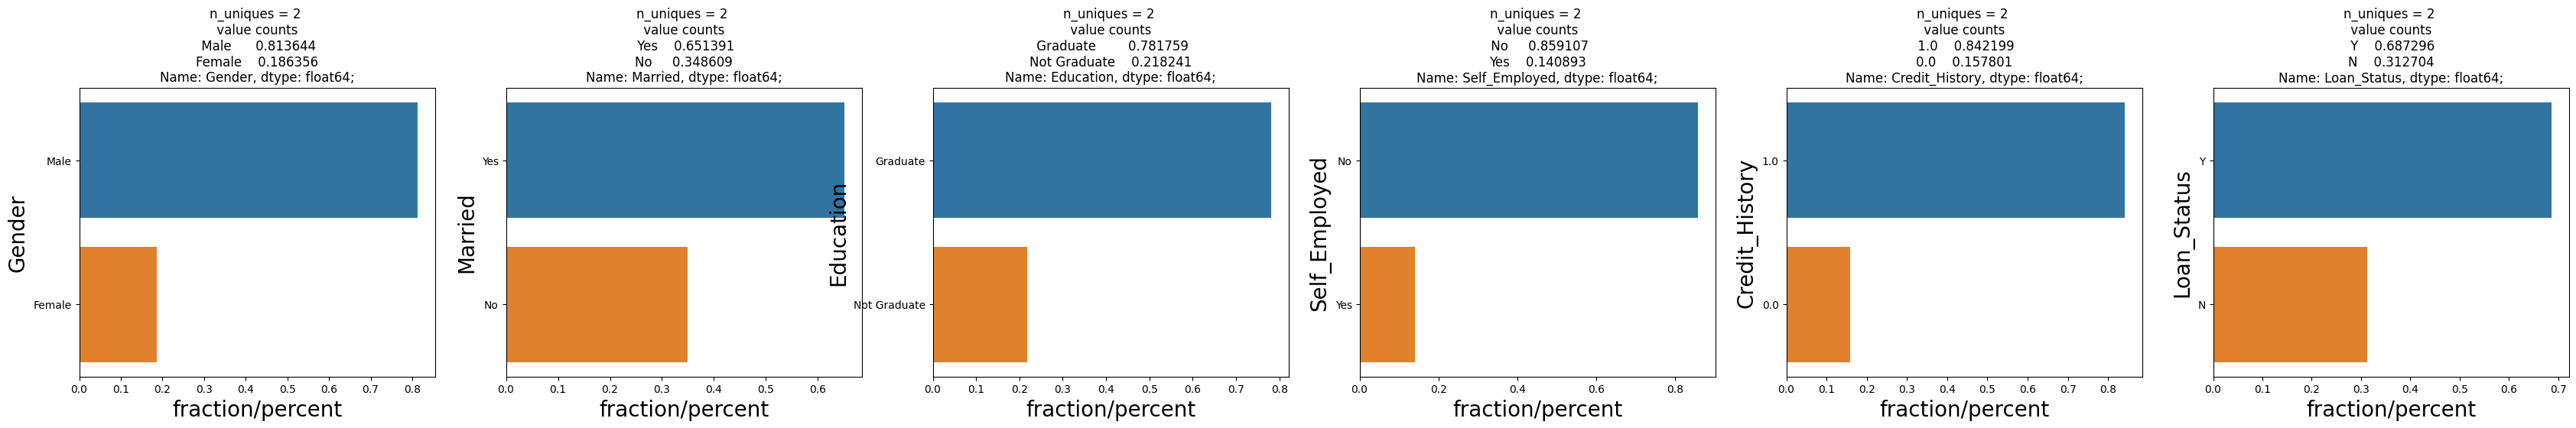

In [7]:
UVA_category(data, ['Gender', 'Married','Education', 'Self_Employed','Credit_History','Loan_Status'])

# Categorical

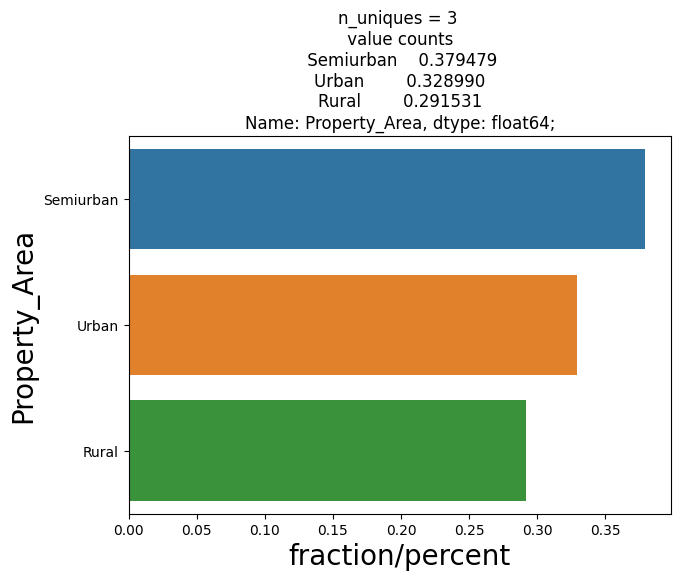

In [8]:
UVA_category(data, ['Property_Area'])

### Q 3: Impute the mode value for all the missing values in the categorical columns ?

In [9]:
data[['Gender', 'Married','Education', 'Self_Employed','Credit_History','Loan_Status','Property_Area']].isnull().sum()

Gender            13
Married            3
Education          0
Self_Employed     32
Credit_History    50
Loan_Status        0
Property_Area      0
dtype: int64

In [10]:
for col in ['Gender', 'Married','Education', 'Self_Employed','Credit_History','Loan_Status','Property_Area']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [11]:
data[['Gender', 'Married','Education', 'Self_Employed','Credit_History','Loan_Status','Property_Area']].isnull().sum()

Gender            0
Married           0
Education         0
Self_Employed     0
Credit_History    0
Loan_Status       0
Property_Area     0
dtype: int64

### Q 4: Check CLT Theorem for all the continuous variable in the data ? Also plot all the descriptive statistics for the sampled data ?

In [12]:
population = data['LoanAmount']

In [13]:
population = pd.DataFrame(population)
population

,LoanAmount
0,NaN
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


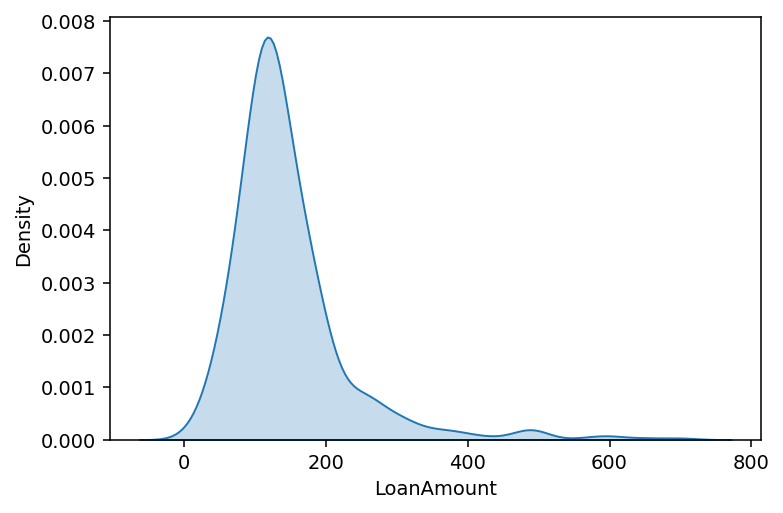

In [14]:
#Before Sampling
plt.figure(dpi = 140)
sns.kdeplot(population['LoanAmount'], shade = True);

In [15]:
# Create a list
sampled_means = []

# For 1000  times,
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=100).mean().values[0])

In [16]:
LoanAmount = population['LoanAmount']


mini = LoanAmount.min()
maxi = LoanAmount.max()
ran = LoanAmount.max()-LoanAmount.min()
mean = LoanAmount.mean()
median = LoanAmount.median()
st_dev =  LoanAmount.std()
skew = LoanAmount.skew()
kurt = LoanAmount.kurtosis()
points = mean-st_dev, mean+st_dev


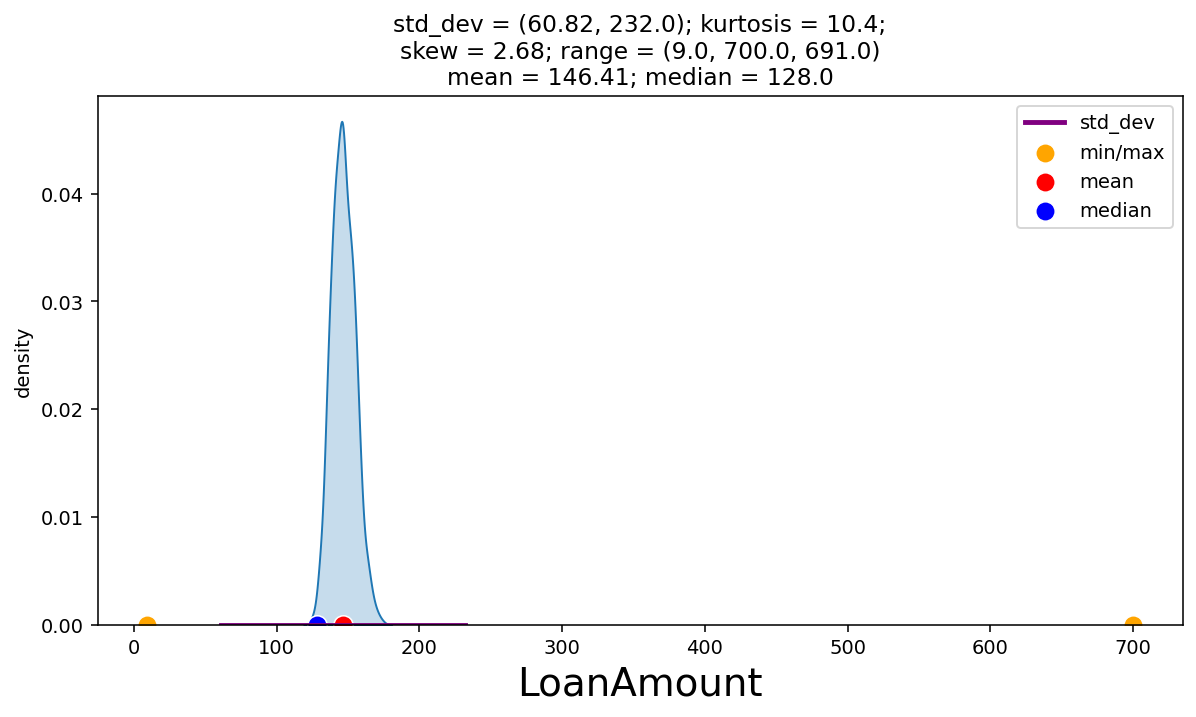

In [19]:
# After Sampling
plt.figure(figsize=(10,5),dpi = 140)
sns.kdeplot(sampled_means, shade=True)
sns.lineplot(points, [0,0], color = 'purple', label = "std_dev",linewidth = 2.5)
sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max",s=100)
sns.scatterplot([mean], [0], color = 'red', label = "mean",s=100)
sns.scatterplot([median], [0], color = 'blue', label = "median",s=100)
plt.xlabel('{}'.format('LoanAmount'), fontsize = 20)
plt.ylabel('density')
plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)));